### Comparing between multiple trained models

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

#### 1. Load and prepare the MNIST dataset

Reminder that the popular MNIST dataset consists of 60,000 samples of digits. Each sample is a 28x28 grayscale image with values between 0 and 255. We also have access to 10,000 supplementary samples for the final testing of the trained model.The preprocessing here consists of normalizing the samples in order to get intensities between 0 and 1.

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
print("Training data shape: ",x_train.shape)
print("Test data shape: ",x_test.shape)
print("Training labels shape: ",y_train.shape)
print("Test labels shape: ",y_test.shape)

Training data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)
Training labels shape:  (60000,)
Test labels shape:  (10000,)


Digit label for test sample #15:  5


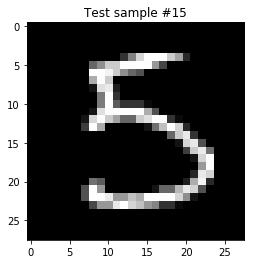

In [12]:
plt.imshow(x_test[15,:,:],cmap='gray')
plt.title('Test sample #15')
print("Digit label for test sample #15: ",y_test[15])

#### 2. Define multiple simple neural networks for MNIST classification

We are going to try 4 models here:
* Model 1: One hidden layer of 32 units, no regularization
* Model 2: One hidden layer of 32 units, dropout regularization
* Model 3: Two hidden layers of 32 and 16 units, no regularization
* Model 4: One hidden layer of 32 units, sigmoid activation instead of ReLU

In [34]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)])

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)])

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)])

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10)])

#### 3. Define the optimizer, loss function and metric for the training procedure

We are going to use the same optimizer, loss and metric for all our models here.

In [35]:
optimizer = tf.keras.optimizers.Adam() # examples: 'Adam', 'RMSprop', 'Adagrad'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # examples: 'BinaryCrossentropy', 'CategoricalCrossentropy'
metrics = ['accuracy']

#### 4. Compile and train the models

For the training, we will be using a validation split of 70/30% (meaning that 70% of the training samples will be used for training and the other 30% will be used for monitoring the performance during training).

In [36]:
model1.compile(optimizer, loss, metrics)
model2.compile(optimizer, loss, metrics)
model3.compile(optimizer, loss, metrics)
model4.compile(optimizer, loss, metrics)

In [16]:
model1_history = model1.fit(x=x_train, y=y_train, batch_size=32,epochs=15,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 4s 106us/sample - loss: 0.4262 - accuracy: 0.8792 - val_loss: 0.2788 - val_accuracy: 0.9209
Epoch 2/15
42000/42000 [==============================] - 4s 86us/sample - loss: 0.2482 - accuracy: 0.9300 - val_loss: 0.2506 - val_accuracy: 0.9284
Epoch 3/15
42000/42000 [==============================] - 3s 83us/sample - loss: 0.2004 - accuracy: 0.9425 - val_loss: 0.2012 - val_accuracy: 0.9430
Epoch 4/15
42000/42000 [==============================] - 4s 84us/sample - loss: 0.1652 - accuracy: 0.9526 - val_loss: 0.1782 - val_accuracy: 0.9497
Epoch 5/15
42000/42000 [==============================] - 4s 88us/sample - loss: 0.1405 - accuracy: 0.9589 - val_loss: 0.1632 - val_accuracy: 0.9533
Epoch 6/15
42000/42000 [==============================] - 4s 83us/sample - loss: 0.1224 - accuracy: 0.9640 - val_loss: 0.1595 - val_accuracy: 0.9535
Epoch 7/15
42000/42000 [==============================]

In [17]:
model2_history = model2.fit(x=x_train, y=y_train, batch_size=32,epochs=15,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 4s 104us/sample - loss: 0.7868 - accuracy: 0.7273 - val_loss: 0.3222 - val_accuracy: 0.9134
Epoch 2/15
42000/42000 [==============================] - 4s 96us/sample - loss: 0.6246 - accuracy: 0.7857 - val_loss: 0.2810 - val_accuracy: 0.9211
Epoch 3/15
42000/42000 [==============================] - 3s 82us/sample - loss: 0.5893 - accuracy: 0.8026 - val_loss: 0.2560 - val_accuracy: 0.9277
Epoch 4/15
42000/42000 [==============================] - 4s 84us/sample - loss: 0.5592 - accuracy: 0.8134 - val_loss: 0.2468 - val_accuracy: 0.9314
Epoch 5/15
42000/42000 [==============================] - 4s 92us/sample - loss: 0.5426 - accuracy: 0.8201 - val_loss: 0.2396 - val_accuracy: 0.9312
Epoch 6/15
42000/42000 [==============================] - 4s 88us/sample - loss: 0.5287 - accuracy: 0.8237 - val_loss: 0.2310 - val_accuracy: 0.9346
Epoch 7/15
42000/42000 [==============================]

In [37]:
model3_history = model3.fit(x=x_train, y=y_train, batch_size=32,epochs=15,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 4s 106us/sample - loss: 0.4472 - accuracy: 0.8700 - val_loss: 0.2447 - val_accuracy: 0.9287
Epoch 2/15
42000/42000 [==============================] - 4s 86us/sample - loss: 0.1986 - accuracy: 0.9422 - val_loss: 0.2063 - val_accuracy: 0.9386
Epoch 3/15
42000/42000 [==============================] - 4s 85us/sample - loss: 0.1575 - accuracy: 0.9530 - val_loss: 0.1822 - val_accuracy: 0.9463
Epoch 4/15
42000/42000 [==============================] - 4s 92us/sample - loss: 0.1342 - accuracy: 0.9601 - val_loss: 0.1617 - val_accuracy: 0.9526
Epoch 5/15
42000/42000 [==============================] - 4s 88us/sample - loss: 0.1149 - accuracy: 0.9651 - val_loss: 0.1536 - val_accuracy: 0.9560
Epoch 6/15
42000/42000 [==============================] - 4s 85us/sample - loss: 0.1016 - accuracy: 0.9688 - val_loss: 0.1467 - val_accuracy: 0.9588
Epoch 7/15
42000/42000 [==============================]

In [19]:
model4_history = model4.fit(x=x_train, y=y_train, batch_size=32,epochs=15,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 4s 91us/sample - loss: 0.4236 - accuracy: 0.8919 - val_loss: 0.2780 - val_accuracy: 0.9254
Epoch 2/15
42000/42000 [==============================] - 4s 87us/sample - loss: 0.2478 - accuracy: 0.9313 - val_loss: 0.2376 - val_accuracy: 0.9341
Epoch 3/15
42000/42000 [==============================] - 3s 82us/sample - loss: 0.2095 - accuracy: 0.9412 - val_loss: 0.2138 - val_accuracy: 0.9414
Epoch 4/15
42000/42000 [==============================] - 5s 115us/sample - loss: 0.1847 - accuracy: 0.9480 - val_loss: 0.2003 - val_accuracy: 0.9437
Epoch 5/15
42000/42000 [==============================] - 3s 80us/sample - loss: 0.1669 - accuracy: 0.9524 - val_loss: 0.1866 - val_accuracy: 0.9488
Epoch 6/15
42000/42000 [==============================] - 4s 86us/sample - loss: 0.1519 - accuracy: 0.9563 - val_loss: 0.1808 - val_accuracy: 0.9499
Epoch 7/15
42000/42000 [==============================]

#### 5. Compare the 4 models by plotting the loss and accuracy curves

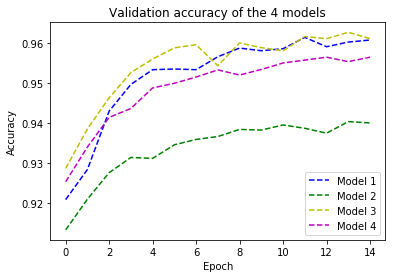

In [39]:
# Plot training & validation accuracy values
plt.plot(model1_history.history['val_accuracy'],'--b')
plt.plot(model2_history.history['val_accuracy'],'--g')
plt.plot(model3_history.history['val_accuracy'],'--y')
plt.plot(model4_history.history['val_accuracy'],'--m')

plt.title('Validation accuracy of the 4 models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4'], loc='lower right')
plt.show()

#### 6. Select the model with the highest accuracy and retrain it on all the training data (training + validation)

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)])

model.compile(optimizer, loss, metrics)

model_history = model.fit(x=x_train, y=y_train, batch_size=32,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3005 - accuracy: 0.9108
Epoch 2/15
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1774 - accuracy: 0.9482
Epoch 3/15
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1483 - accuracy: 0.9566
Epoch 4/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1322 - accuracy: 0.9610
Epoch 5/15
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1196 - accuracy: 0.9645
Epoch 6/15
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1094 - accuracy: 0.9671
Epoch 7/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1012 - accuracy: 0.9690s - loss: 0.1011 - accuracy: 0.96
Epoch 8/15
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0957 - accuracy: 0.9710
Epoch 9/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0890 

#### 7. Evaluate the performance of the trained model on test (unseen) data

In [42]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.1400 - accuracy: 0.9625


[0.1399819991726894, 0.9625]

#### 8. Make a prediction using the model

In [44]:
test_predicted = model.predict_classes(x_test[10:25,:,:])
print("Classes predicted by the model: ",test_predicted)
print("Targets: ",y_test[10:25])

Classes predicted by the model:  [0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
Targets:  [0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
